**SLR**


In [44]:
# Step 1: Import necessary libraries

import numpy as np  # For handling numerical data

import matplotlib.pyplot as plt  # For data visualization

from sklearn.linear_model import LinearRegression  # For building the regression model

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score  # For evaluating the model

import statsmodels.api as sm  # For OLS (Ordinary Least Squares) Regression

from sklearn.preprocessing import PolynomialFeatures  # For polynomial transformation
 

In [8]:
# Step 2: Define the dataset (Experience in years and corresponding Salary in $1000s)

np.random.seed(42)  # Ensuring reproducibility of random noise
 
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(-1, 1)  # Independent variable (Experience)

true_salaries = np.array([30, 35, 40, 45, 50, 55, 60, 65, 70, 75])  # True salary values
 

In [9]:
# Adding some random noise to salaries to reduce accuracy
noise = np.random.normal(0, 5, size=true_salaries.shape)  # Adding Gaussian noise (mean=0, std=5)
Y = true_salaries + noise  # Final dependent variable with noise

In [45]:
# Step 3: Convert data into Polynomial Features (degree 2 for quadratic relationship)
degree = 2  # You can change this for higher degrees
poly = PolynomialFeatures(degree=degree)  # Creating polynomial feature transformer
X_poly = poly.fit_transform(X)  # Transforming X to polynomial features

In [10]:
#Step 3: Create a linear Regression model
model = LinearRegression() #Initialize the model

In [42]:
#Step 4: Train the model using the dataset
model.fit(X,Y)#The model learns the best-fit line by minimizing the error

LinearRegression()

In [47]:
#Step 5: finding intercept(c) and coefficient(slope-m) for the given data set
c = model.intercept_#intercept(where the line crosses the Y-axis) - c
m = model.coef_[0]#coefficient (slope) of the regression line - m

print(f"Intercept: {c}")
print(f"Coefficients: {m}")

Intercept: 27.430065779800536
Coefficients: 4.965498141580591


In [25]:
#Step 6: Display the equation of the line
print(f"Equation of the line: Y = {m: .2f}X+{c: .2f}")
#get an error if use .2f directly, without mentioning as model.coef_[0] in the above code of line

Equation of the line: Y =  4.97X+ 27.43


In [27]:
#Step 7: Predict Values using the model
Y_pred = model.predict(X) #Predict salaries for the given experience values

**Mean_Square_Error**

In [28]:
#1.Mean Squared Error(MSE) - Measures average squared difference between actual and predicted values
mse = mean_squared_error(Y,Y_pred)
print(f"Mean Squared Error(MSE): {mse:.2f}")

Mean Squared Error(MSE): 11.75


**Mean_Absolute_Error**

In [29]:
#2. Mean Absolute Error (MAE) - Measures average absolute difference between actual and predicted values
mae = mean_absolute_error(Y,Y_pred)
print(f"Mean Absolute Error(MAE): {mae:.2f}")

Mean Absolute Error(MAE): 2.87


In [30]:
#3. Root Mean Squared Error (RMSE) - Measures standard derivation of residuals (errors)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error(RMSE): {rmse:.2f}")

Root Mean Squared Error(RMSE): 3.43


**R-Squared**

In [31]:
#4. R-squared(R^2) - Represents how well the model fits the data(0 to 1,where 1 is best)
r2 = r2_score(Y,Y_pred)
print(f"R-Squared (R^2): {r2:.2f}")

R-Squared (R^2): 0.95


In [34]:
#5. Adjusted R-squared(R^2_adj) - Adjusted for the number of predictors, better for multiple regression
n = len(Y)#Number of observations
p = 1 #Number of independent variables(Experience)
adj_r2 = 1-((1-r2) * (n-1)/(n-p-1))
print(f"Adjusted R-squared: {adj_r2:.2f}")

Adjusted R-squared: 0.94


In [46]:
# 6. Ordinary Least Squares (OLS) Summary - Gives detailed statistical summary of the regression
X_ols = sm.add_constant(X_poly)  # Add intercept term for OLS regression
ols_model = sm.OLS(Y, X_ols).fit()  # Fit OLS model
print("\nOLS Regression Summary:\n")
print(ols_model.summary())  # Display detailed statistical summary


OLS Regression Summary:

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     62.13
Date:                Sat, 01 Mar 2025   Prob (F-statistic):           3.50e-05
Time:                        12:10:23   Log-Likelihood:                -26.390
No. Observations:                  10   AIC:                             58.78
Df Residuals:                       7   BIC:                             59.69
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.8348     

C:\Users\CVR\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


**Step 8: Visualization Part**

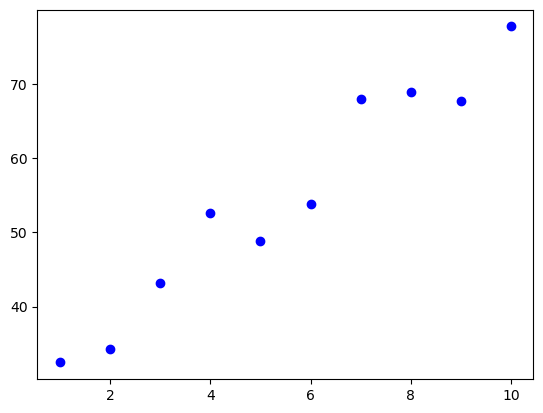

In [35]:
#Step 8: Plot the actual data points
plt.scatter(X,Y,color='blue',label = 'Actual Data') #Scatter plot of actual values

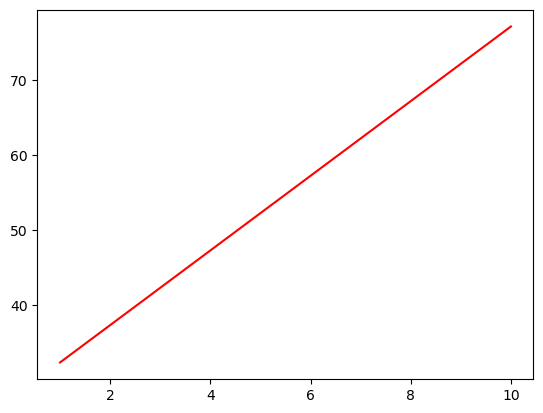

In [38]:
#Step 9: Plot the Regression line(Best fit line)
plt.plot(X,Y_pred, color = 'red',label='Best Fit Line')#Regression line

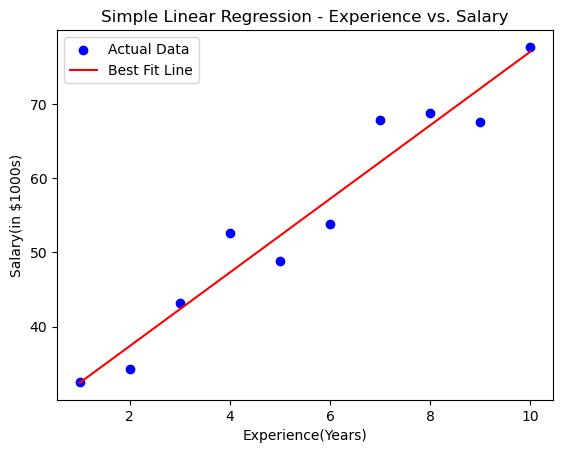

In [39]:
#Plot the actual data points
plt.scatter(X,Y,color='blue',label = 'Actual Data') #Scatter plot of actual values

#Plot the Regression line(Best fit line)
plt.plot(X,Y_pred, color = 'red',label='Best Fit Line')#Regression line

#Add labels and legend
plt.xlabel("Experience(Years)")#label for X-axis
plt.ylabel("Salary(in $1000s)")#label for Y-axis
plt.title('Simple Linear Regression - Experience vs. Salary')#Title of the plot
plt.legend()#Show legend

# Display the graph
plt.show() #Show the final plotted graph

**Step 9: Feature Prediction**

In [41]:
#User can input experience, and the model will predict salary
while True:
    try:
        exp = float(input("\n Enter years of experience to predict salary (or -1 to exit): "))
        if exp == -1:
            break #Exit the loop
        predicated_salary = model.predict(np.array([[exp]]))[0]
        print(f"Predicted Salary for {exp} years of experience: ${predicated_salary:.2f}K")
    
    except ValueError:
        print("Please enter a valid number")


 Enter years of experience to predict salary (or -1 to exit): 1
Predicted Salary for 1.0 years of experience: $32.40K

 Enter years of experience to predict salary (or -1 to exit): 0
Predicted Salary for 0.0 years of experience: $27.43K

 Enter years of experience to predict salary (or -1 to exit): -1
